## 1&2. Setup and Data Preparation
#### In this section, we are going to install the required libraries and read the dataset file. Then an overview of the dataset will be shown.

In [50]:
import pandas as pd

df = pd.read_csv('Tweets/tweets.csv')
df

,id,keyword,location,text,target
0,0,ablaze,NaN,"Communal violence in Bhainsa, Telangana. ""Ston...",1
1,1,ablaze,NaN,Telangana: Section 144 has been imposed in Bha...,1
2,2,ablaze,New York City,Arsonist sets cars ablaze at dealership https:...,1
3,3,ablaze,"Morgantown, WV",Arsonist sets cars ablaze at dealership https:...,1
4,4,ablaze,NaN,"""Lord Jesus, your love brings freedom and pard...",0
...,...,...,...,...,...
11365,11365,wrecked,Blue State in a red sea,Media should have warned us well in advance. T...,0
11366,11366,wrecked,arohaonces,i feel directly attacked 💀 i consider moonbin ...,0
11367,11367,wrecked,🇵🇭,i feel directly attacked 💀 i consider moonbin ...,0
11368,11368,wrecked,auroraborealis,"ok who remember ""outcast"" nd the ""dora"" au?? T...",0


## 3. Data Exploration
#### In this part, we are going to see some basic statistics of our dataset

#### The describe function will show us the mean, std, min, etc. attributes of the numerical columns. In this case there would be the id and target columns. Since the id gives us no information, we can only consider the target column. As we can see, there are 11370 sample datas with the values of 1 or 0. Since the mean of the targets is 0.18, we can understand that most of the targets are equal to 0.

In [51]:
df.describe()

,id,target
count,11370.000000,11370.000000
mean,5684.500000,0.185928
std,3282.380615,0.389066
min,0.000000,0.000000
25%,2842.250000,0.000000
50%,5684.500000,0.000000
75%,8526.750000,0.000000
max,11369.000000,1.000000


### Now we are going to create plots to have a visual understanding of the distribution of our data in different columns

#### As mentioned above, most of our data targets are equal to 0

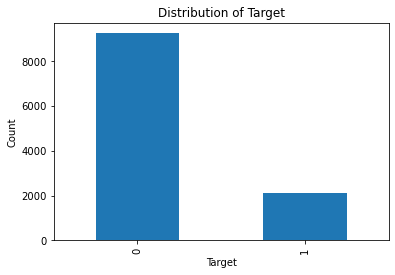

In [41]:
import matplotlib.pyplot as plt

df['target'].value_counts().plot(kind='bar')
plt.title('Distribution of Target')
plt.xlabel('Target')
plt.ylabel('Count')
plt.show()

#### The following plot shows the distribution of different keywords in our dataset.
#### As we can see, there are some keywords that have been appeared only once, and the maximum datas with similar keyword in their text description is around 90.

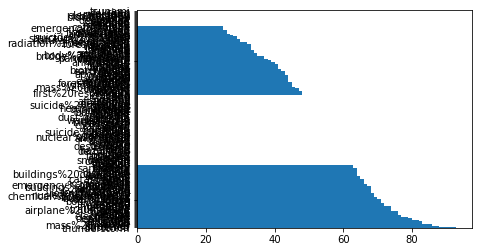

In [42]:
df['keyword'].value_counts().plot(kind='barh')

#### In order to find the Nan values, we can use the isna() function. As we can see, there are 3418 Nan values in the location attribute of our dataset.

In [43]:
df.isna().sum()

id             0
keyword        0
location    3418
text           0
target         0
dtype: int64

## 4. Data Preprocessing
#### In this section, we are going to perform some preprocessing before training our ML model. 

#### Instead of complex text analysis on the "text" attribute of our dataset, we ae going to add a new attribute which is text size to our dataset columns.

In [52]:
sen_lengths = []
for sentence in df['text']:
    sen_lengths.append(len(sentence.split()))
df = df.drop('text', axis=1)
df['text_size'] = sen_lengths
df

,id,keyword,location,target,text_size
0,0,ablaze,NaN,1,19
1,1,ablaze,NaN,1,23
2,2,ablaze,New York City,1,7
3,3,ablaze,"Morgantown, WV",1,8
4,4,ablaze,NaN,0,23
...,...,...,...,...,...
11365,11365,wrecked,Blue State in a red sea,0,17
11366,11366,wrecked,arohaonces,0,22
11367,11367,wrecked,🇵🇭,0,23
11368,11368,wrecked,auroraborealis,0,17


#### Just to have an understanding of the distribution of text lengths, we show a plot that shows most of our datas have the length of 21. Also the describe function gives us a sense of our new attribute.

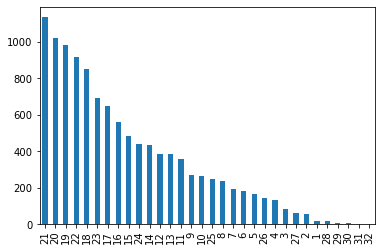

In [53]:
df['text_size'].value_counts().plot(kind='bar')

In [54]:
df.describe()

,id,target,text_size
count,11370.000000,11370.000000,11370.000000
mean,5684.500000,0.185928,17.166139
std,3282.380615,0.389066,5.510808
min,0.000000,0.000000,1.000000
25%,2842.250000,0.000000,14.000000
50%,5684.500000,0.000000,18.000000
75%,8526.750000,0.000000,21.000000
max,11369.000000,1.000000,32.000000


#### Now we are going to drop the rows with a Nan value in their location. Our dataset's size will decrease to 7952.

In [56]:
new_df = df.dropna()
new_df

,id,keyword,location,target,text_size
2,2,ablaze,New York City,1,7
3,3,ablaze,"Morgantown, WV",1,8
5,5,ablaze,OC,0,23
6,6,ablaze,"London, England",1,21
7,7,ablaze,Bharat,1,24
...,...,...,...,...,...
11362,11362,wrecked,feuille d'érable,0,8
11365,11365,wrecked,Blue State in a red sea,0,17
11366,11366,wrecked,arohaonces,0,22
11367,11367,wrecked,🇵🇭,0,23


#### Since "Keyword" and "location" are categorical variables, we would encode them to numbers so that our ML model would have a better sense of the data and predict the target value better.

In [57]:
new_df.keyword = pd.Categorical(new_df.keyword)
new_df['keyword'] = pd.factorize(new_df['keyword'])[0] + 1
new_df.location = pd.Categorical(new_df.location)
new_df['location'] = pd.factorize(new_df['location'])[0] + 1
new_df

c:\users\sina\appdata\local\programs\python\python37-32\lib\site-packages\pandas\core\generic.py:5491: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
c:\users\sina\appdata\local\programs\python\python37-32\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
c:\users\sina\appdata\local\programs\python\python37-32\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try usi

,id,keyword,location,target,text_size
2,2,1,1,1,7
3,3,1,2,1,8
5,5,1,3,0,23
6,6,1,4,1,21
7,7,1,5,1,24
...,...,...,...,...,...
11362,11362,219,4501,0,8
11365,11365,219,4502,0,17
11366,11366,219,4503,0,22
11367,11367,219,1471,0,23


## 5&6. Model building and training

#### Now we are going to create our train and test datasets and choose a model for training
#### The test dataset would have the size of %20 and the train dataset would have the size of %80.

In [58]:
from sklearn.model_selection import train_test_split

y = new_df['target']
X = new_df.drop('target', axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

#### Now that we have our train and test datasets, we are going to train our model

## 7. Evaluation
#### The accuracy function is used to calculate the accuracy of our final prediction.

In [86]:
from sklearn import metrics

def accuracy(ans, predicted):
    sum = 0
    n = len(predicted)
    count= 0
    for y in ans:
        temp = 0
        if predicted[count] < 0.5:
            temp = 0
        else:
            temp = 1
        if temp == y:
            sum += 1
        count += 1
    return sum / n

In [79]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score

regressor = LinearRegression()
regressor.fit(X_train, y_train)
y_pred = regressor.predict(X_test)

print('Accuracy: ', accuracy(y_test, y_pred))

Accuracy:  0.7969830295411691


#### Now we change our algorithm to decision tree classification

In [83]:
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier(random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print('Accuracy: ', accuracy(y_test, y_pred))

Accuracy:  0.7460716530483973


#### As we can see, the accuracy dropped after using the decision tree clasifier
#### Now we are going to change the model to KNN

In [87]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

k = 5
model = KNeighborsClassifier(n_neighbors=k)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print('Accuracy: ', accuracy(y_test, y_pred))

Accuracy:  0.7969830295411691


## 8.Hyperparameter tuning
#### changing the K to 3

In [89]:
k = 3
model = KNeighborsClassifier(n_neighbors=k)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print('Accuracy: ', accuracy(y_test, y_pred))

Accuracy:  0.7749842866121935


#### changing the K to 13

In [103]:
k = 13
model = KNeighborsClassifier(n_neighbors=k)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print('Accuracy: ', accuracy(y_test, y_pred))

Accuracy:  0.8177247014456317


#### Now that we have found the best accuracy, we will show the confusion matrix and classification report

In [104]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

# Generate and print classification report
class_report = classification_report(y_test, y_pred)
print("Classification Report:")
print(class_report)

Confusion Matrix:
[[1230   38]
 [ 252   71]]
Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.97      0.89      1268
           1       0.65      0.22      0.33       323

    accuracy                           0.82      1591
   macro avg       0.74      0.59      0.61      1591
weighted avg       0.79      0.82      0.78      1591



### To create a machine learning model, there are some fundamental steps that we should take. As per this assignment, we first took a general look at our dataset and saw how the data was distributed. Then by preprocessing the dataset and cleaning the unnecessary invalid data, we made a better-understanding dataset to our machine learning model.
### Finally, by trying different models for training, we found out the best model to train for our dataset and showed the accuracy of its prediction.
### This assignment was a great experience for reviewing the basics of creating any ML model. 